**PROBLEM STATEMENT**

**This project aims to identify the level of satisfaction of the passengers to know the quality of services provided by the airline companies, the key factor that derive customer satisfaction and identifying the ways how airline industry can improve the service quality. Focus in developing the better idea for future. This eventually lead the factors having positive and negative influence on service quality of airline industry.**

**IMPORTING LIBRARIES**

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns


**LOADING THE DATASET**

In [2]:
df1 = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv", index_col = ['id'])#made the index as id

**TRAIN DATASET**

In [3]:
df1.head()

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
5047,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
110028,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
24026,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
119299,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df1.drop(['Unnamed: 0'],axis = 1,inplace = True)
#deleted the 'Unnamed: 0' column and made the change permanent

In [5]:
df1.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


**EXPLORATORY DATA ANALYSIS**

In [6]:
df1.shape #defines the shape/dimension of the data (103904 rows, 23 columns)

(103904, 23)

In [7]:
df1.info() #gives the information

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 70172 to 62567
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    103904

In [8]:
pd.isnull(df1) ## false indicates no null values in the dataset

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5047,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
110028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24026,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
119299,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94171,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73097,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
68825,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
# Replace spaces in the column names with underscore
df1.columns = [c.replace(" ","_") for c in df1.columns]

In [10]:
pd.isnull(df1).sum()

Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             310
satisfaction                           0
dtype: int64

**Column Arrival_Delay_in_Minutes consist of 310 null values**

In [11]:
# remove rows having null values

df1.dropna(inplace = True)    
pd.isnull(df1).sum()

Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

In [12]:
df1['Type_of_Travel'].nunique()

2

In [13]:
df1['Customer_Type'].nunique()

2

In [14]:
df1['Customer_Type'] = df1['Customer_Type'].astype('category')
df1['Type_of_Travel'] = df1['Type_of_Travel'].astype('category')
df1['Age'] = df1['Age'].astype('category')
df1['Gender'] = df1['Gender'].astype('category')
df1["Arrival_Delay_in_Minutes"] = df1["Arrival_Delay_in_Minutes"].astype("int")

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 70172 to 62567
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103594 non-null  category
 1   Customer_Type                      103594 non-null  category
 2   Age                                103594 non-null  category
 3   Type_of_Travel                     103594 non-null  category
 4   Class                              103594 non-null  object  
 5   Flight_Distance                    103594 non-null  int64   
 6   Inflight_wifi_service              103594 non-null  int64   
 7   Departure/Arrival_time_convenient  103594 non-null  int64   
 8   Ease_of_Online_booking             103594 non-null  int64   
 9   Gate_location                      103594 non-null  int64   
 10  Food_and_drink                     103594 non-null  int64   
 11  Online_boarding             

In [16]:
df1.describe().style.background_gradient() #describe numeric columns

,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


**IDENTIFYING OUTLIERS**

**Satisfaction Count**

In [17]:
df1['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58697
satisfied                  44897
Name: count, dtype: int64

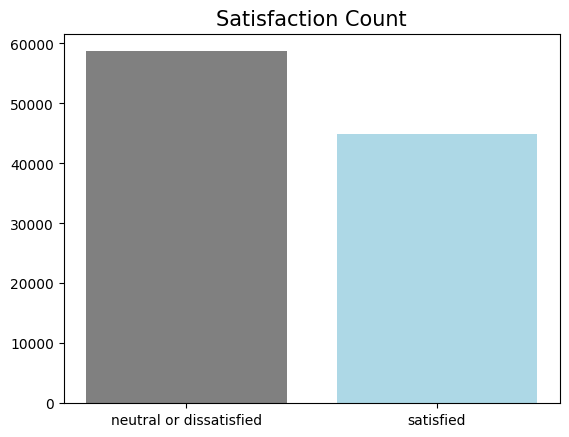

In [18]:
x = df1['satisfaction'].value_counts().index
y = df1['satisfaction'].value_counts()
plt.bar(x,y,color = ['grey','lightblue'])
plt.title('Satisfaction Count', fontsize = 15)

plt.show()

**Passenger Profile**

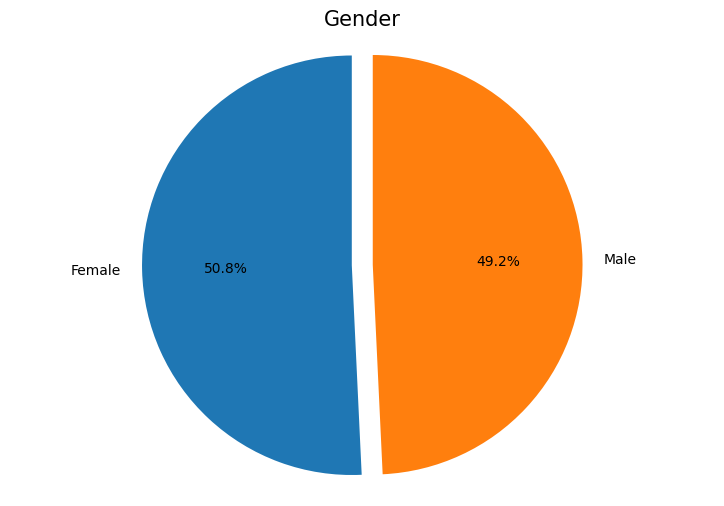

In [22]:
fig = plt.figure(figsize=(20,6))
grid = gridspec.GridSpec(nrows = 1,ncols = 2,figure = fig)

ax3 = fig.add_subplot(grid[0,1:])
ax3.set_title("Gender",fontsize = 15)
label = list(df1['Gender'].value_counts().index)
value = list(df1["Gender"].value_counts().values)
plt.pie(value,labels=label,autopct="%1.1f%%",explode = (0,0.1),startangle = 90)
plt.axis("equal")
#sns.countplot(x = "satisfaction",data = df,ax = ax1,hue = "satisfaction")
plt.show()

**High number of passengers are females.**

**Customer Type**

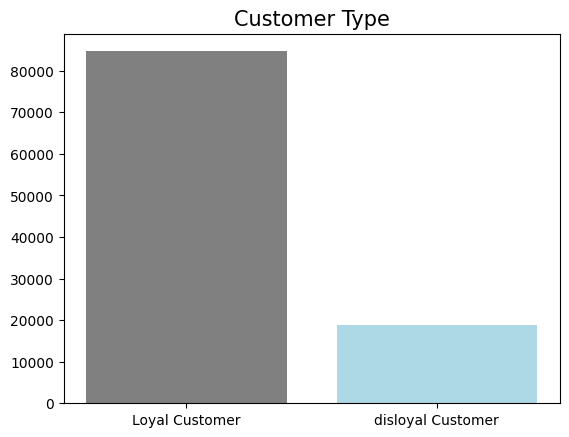

In [23]:
x = df1['Customer_Type'].value_counts().index
y = df1['Customer_Type'].value_counts()
plt.bar(x,y,color = ['grey','lightblue'])
plt.title('Customer Type', fontsize = 15)

plt.show()

**Majority of the customers are giving the right feedback and thus loyal.**

**Class Distribution**

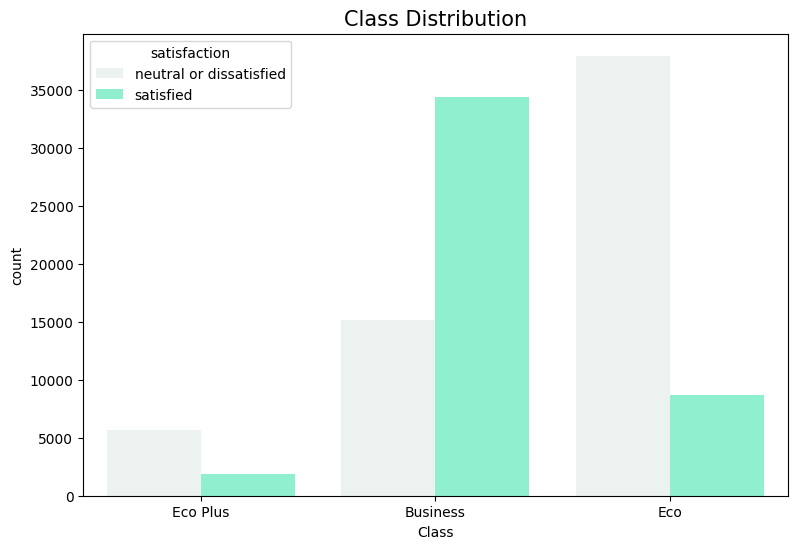

In [27]:
fig = plt.figure(figsize=(20,6))   
ax2 = fig.add_subplot(grid[0,:1])
plt.title("Class Distribution",fontsize = 15)


sns.countplot(x = df1["Class"],hue = df1["satisfaction"],ax = ax2,color = "aquamarine")


plt.show()

**People travelling in business class are more satisfied comparison to other classes.**

CONCLUSION


* Most of the population was neutral or dissatisfied by the services being provided.
* Most of the passengers were female.
* Majority of them were the loyal customers.
* People travelling in business class are more satisfied comparison to other classes.